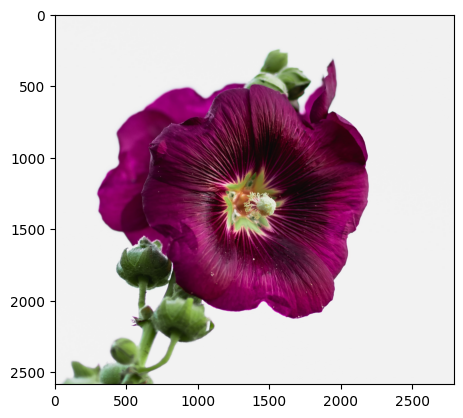

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


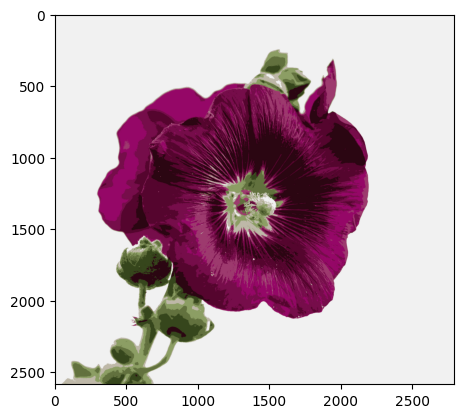

In [ ]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from PIL import Image
import matplotlib.pyplot as plt
def compute_histogram(image):
    # Compute the histogram of the image
    histogram = np.histogram(image.flatten(), bins=256)[0]
    return histogram

def progressive_histogram_quantization(image, desired_bins):
    histogram = compute_histogram(image)
    # Initialize min_val and min_idx
    min_val = np.min(histogram)
    min_idx = np.argmin(histogram)
    while np.count_nonzero(histogram) > desired_bins:
        # Use the stored min_val and min_idx
        K = min_idx
        # Find the first bin to the left of K
        L = K - 1
        # Find the first bin to the right of K
        R = K + 1 if K < len(histogram) - 1 else K
        # Merge bin K to bin R or L based on the conditions
        if histogram[R] >= histogram[K] and abs(K - R) <= abs(K - L):
            histogram[R] += histogram[K]
        else:
            histogram[L] += histogram[K]
        histogram[K] = 0
        # Update min_val and min_idx
        non_zero_histogram = histogram[np.nonzero(histogram)]
        if len(non_zero_histogram) > 0:
            min_val = np.min(non_zero_histogram)
            min_idx = np.nonzero(histogram == min_val)[0][0]
    return histogram

def kmeans_quantization(image, n_clusters):
    # Reshape the image to be a list of RGB values
    reshaped_image = image.reshape(-1, 3)
    # Perform MiniBatchKMeans clustering
    kmeans = MiniBatchKMeans(n_clusters=n_clusters)
    kmeans.fit(reshaped_image)
    # Replace each pixel value with its corresponding cluster center
    quantized_image = kmeans.cluster_centers_[kmeans.labels_]
    quantized_image = quantized_image.reshape(image.shape).astype(np.uint8)
    return quantized_image

# Load the image
image = np.array(Image.open('sample_flower.jpg'))
plt.imshow(image)
plt.show()

# Apply Progressive Histogram Quantization
progressive_histogram_quantization(image, desired_bins=128)

# Apply Kmeans color quantization
quantized_image = kmeans_quantization(image, n_clusters=10)

# Save the quantized image
Image.fromarray(quantized_image).save('quantized_image.jpeg')
# Visualize the quantized image
plt.imshow(quantized_image)
plt.show()